# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import time

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [2]:
browser = Browser('chrome', service=Service(executable_path=ChromeDriverManager().install()))

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

time.sleep(5)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
print(soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [6]:
# Extract all rows of data
#tables first
table = soup.find('table')

#then headers
headers = [header.get_text() for header in table.find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
#Now make it a DataFrame
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    row_data = [cell.get_text() for cell in cells]
    rows.append(row_data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_data = pd.DataFrame(rows, columns=headers)

In [64]:
# Confirm DataFrame was created successfully
mars_temp_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [66]:
# Examine data type of each column
mars_temp_data.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# Change data types for data analysis and Verify the data types
mars_temp_data['terrestrial_date'] = pd.to_datetime(mars_temp_data['terrestrial_date'])
mars_temp_data['sol'] = mars_temp_data['sol'].astype(int)
mars_temp_data['ls'] = mars_temp_data['ls'].astype(int)
mars_temp_data['month'] = mars_temp_data['month'].astype(int)
mars_temp_data['min_temp'] = mars_temp_data['min_temp'].astype(float)
mars_temp_data['pressure'] = mars_temp_data['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
print(mars_temp_data.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
unique_months = mars_temp_data['month'].nunique()
print(f"There are {unique_months} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_temp_data['sol'].count()
total_terrestrial_days = mars_temp_data['terrestrial_date'].nunique()

print(f"Total sols in dataset: {total_sols}")
print(f"Total terrestrial days in dataset: {total_terrestrial_days}")

Total sols in dataset: 1867
Total terrestrial days in dataset: 1867


In [44]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_temp_data.groupby('month')['min_temp'].mean().reset_index()
print("Average Minimum Temperature by Month:")
print(avg_min_temp_by_month)

Average Minimum Temperature by Month:
    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


In [45]:
# Plot the average minimum temperature by month
avg_min_temp_by_month_sorted = avg_min_temp_by_month.sort_values(by='min_temp', ascending=False)

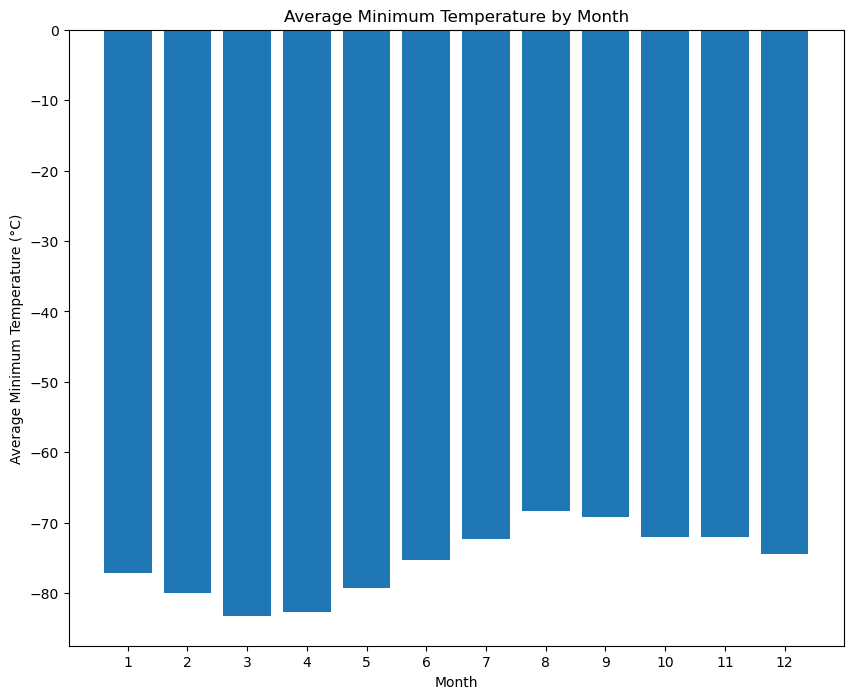

In [46]:
plt.figure(figsize=(10, 8))
plt.bar(avg_min_temp_by_month_sorted['month'], avg_min_temp_by_month_sorted['min_temp'])
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(avg_min_temp_by_month_sorted['month'])

plt.show()

In [49]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_temp_data.groupby('month')['pressure'].mean().reset_index()
print("Average Pressure by Month:")
print(avg_pressure_by_month)

Average Pressure by Month:
    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


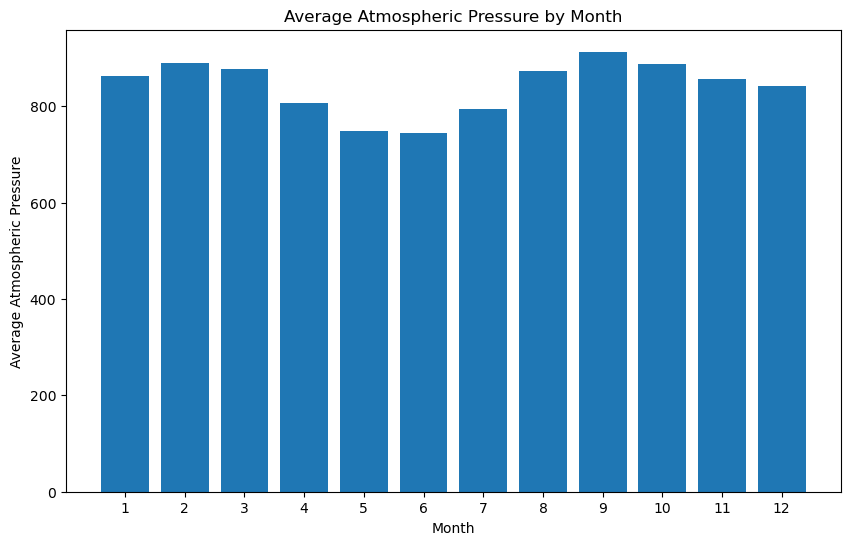

In [ ]:
# Plot the average pressure by month
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values(by='pressure', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(avg_pressure_by_month_sorted['month'], avg_pressure_by_month_sorted['pressure'])
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(avg_pressure_by_month_sorted['month'])

plt.show()

In [60]:
max_date-min_date

Timedelta('2021 days 00:00:00')

In [27]:
mars_temp_data['terrestrial_date'] = pd.to_datetime(mars_temp_data['terrestrial_date'])

The Martian year spans 2021 Earth days.


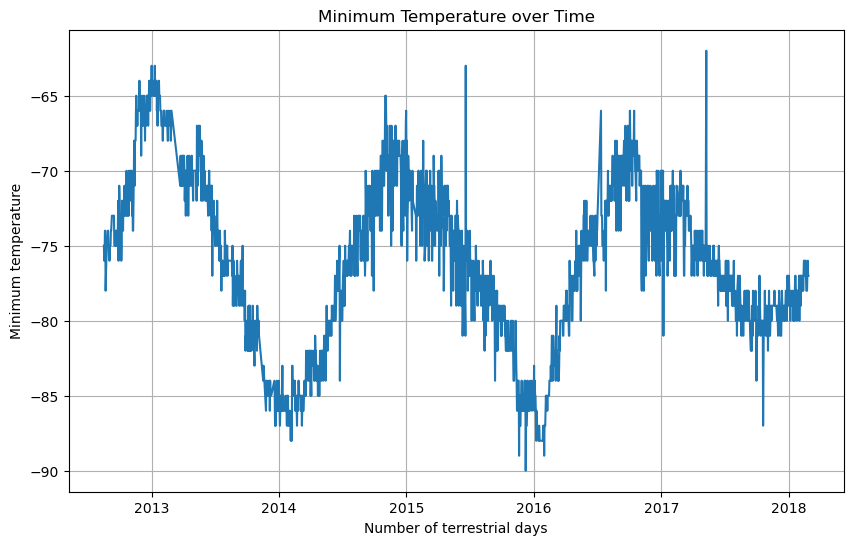

In [29]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
min_date = mars_temp_data['terrestrial_date'].min()
max_date = mars_temp_data['terrestrial_date'].max()
martian_year_length = (max_date - min_date).days

print(f"The Martian year spans {martian_year_length} Earth days.")

plt.figure(figsize=(10, 6))
plt.plot(mars_temp_data['terrestrial_date'], mars_temp_data['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.grid(True)
plt.show()

#### Minimum Temperature
Coldest Months = Average Minimum Temperature was -68.382979 in month 8.

Warmest Months = Average Minimum Temperature was -83.307292 in month 3.

#### Atmospheric Pressure
Lowest Pressure = Average Low Pressure was 745.054422 in month 6.

Highest Pressure = Average High Pressure was 889.455056 in month 2.

#### Year Length
Based off the data, a Martian year would be 2021 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [67]:
# Write the data to a CSV
mars_temp_data.to_csv('mars_weather_data.csv', index=False)
print("DataFrame exported to 'mars_weather_data.csv'")

DataFrame exported to 'mars_weather_data.csv'


In [68]:
browser.quit()